# Explainaility

## Environment Setup

In [ ]:
import pandas as pd
import tensorflow as tf
import os
import shutil
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from keras import layers
from keras import models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from numpy import expand_dims
from matplotlib import pyplot
from keras.models import Model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import seaborn as sns
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
height = 224
width = 224

image_path = '/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset/train/Edgar_Degas/Edgar_Degas_10.jpg'

model_vgg_path = '/content/drive/Shareddrives/DeepLearning-ArtClassification/Models/VGG16Weights/NoDropout.h5'
model_inception_path = '/content/drive/Shareddrives/DeepLearning-ArtClassification/Models/InceptionNet/Inception_NoDropout.h5'
model_from_scratch_path = '/content/drive/Shareddrives/DeepLearning-ArtClassification/Models/CNN_from_scratch/9_CNN_Double_inception.h5'
model_resnet_path = '/content/drive/Shareddrives/DeepLearning-ArtClassification/Models/ResNet50Weights/NoDropout.h5'


## Explainablity Class

In [ ]:
class Explainability:

  def __init__(self, image_path, model_path, height, width):
    self.layer_activations = None
    self.layer_names = []
    self.image_path = image_path
    self.model = models.load_model(model_path)

    img = image.load_img(image_path, target_size=(height, width))
    self.image_tensor = img_to_array(img)
    self.image_tensor = np.expand_dims(self.image_tensor, axis=0)


  def print_image(self):
    plt.imshow(self.image_tensor[0].astype('uint8'))
    plt.show()
    print(self.image_path)


  def get_activations_maps(self, base_model=0):
    layer_outputs = []

    if(base_model != 0):
      self.model = self.model.get_layer(base_model)

    for layer in self.model.layers:
      if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        self.layer_names.append(layer.name)
    
    self.layer_activation = keras.Model(inputs=self.model.input, outputs=layer_outputs)


  def print_activations(self, num_layers_to_show=3, images_per_row=12):
    activations = self.layer_activation.predict(self.image_tensor)

    counter_layers = 0

    for layer_name, layer_activation in zip(self.layer_names, activations):
      counter_layers += 1

      if num_layers_to_show:
        if counter_layers > num_layers_to_show and counter_layers < (len(activations) - num_layers_to_show):
          continue
        

      # Number of features in the feature map
      n_features = layer_activation.shape[-1]

      # The feature map has shape (1, image_height, image_width, n_features)
      size = layer_activation.shape[1]

      n_cols = n_features // images_per_row
      display_grid = np.zeros((size * n_cols, images_per_row * size))

      for col in range(n_cols):
          for row in range(images_per_row):
              channel_image = layer_activation[0,:, :, col * images_per_row + row]
              # post-processes the feature to make it visually palatable
              channel_image -= channel_image.mean() 
              channel_image /= channel_image.std() 
              # after this phase we have a standard normal distribution with 95% 
              # of pixel values in the interval [-2,2], multiply for 64 to get the interval [-128, 128]
              channel_image *= 64 
              # sum 128 to get the interval [0, 255]
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

      # Display the grid
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='gray')
      
    plt.show()

 


## Explainability: ResNet50 

In [ ]:
exp_resnet = Explainability(image_path, model_resnet_path, height, width)

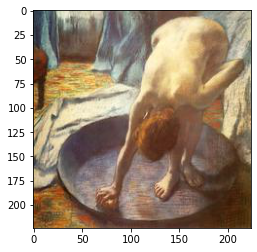

/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset/train/Edgar_Degas/Edgar_Degas_10.jpg


In [ ]:
exp_resnet.print_image()

In [ ]:
exp_resnet.get_activations_maps('resnet50')

In [ ]:
exp_resnet.print_activations()

## Explainability: Vgg16
 

In [ ]:
exp_vgg = Explainability(image_path, model_vgg_path, height, width)

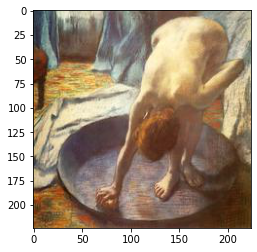

/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset/train/Edgar_Degas/Edgar_Degas_10.jpg


In [ ]:
exp_vgg.print_image()

In [ ]:
exp_vgg.get_activations_maps('vgg16')

1/1 [==============================] - 0s 136ms/step


<ipython-input-42-9433ce6061cd>:61: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


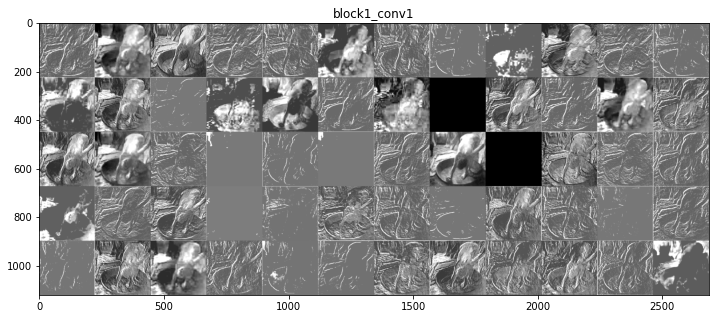

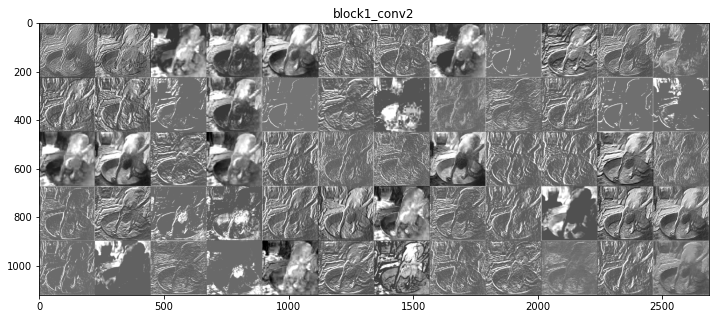

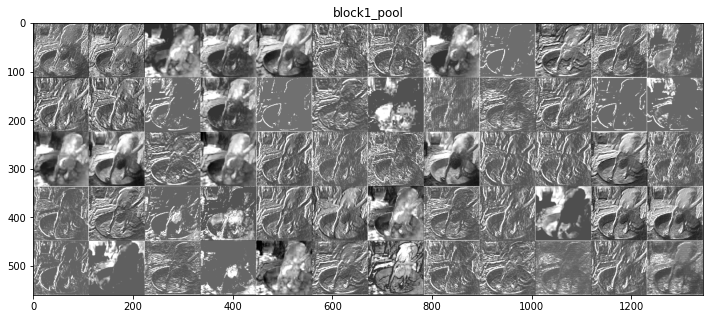

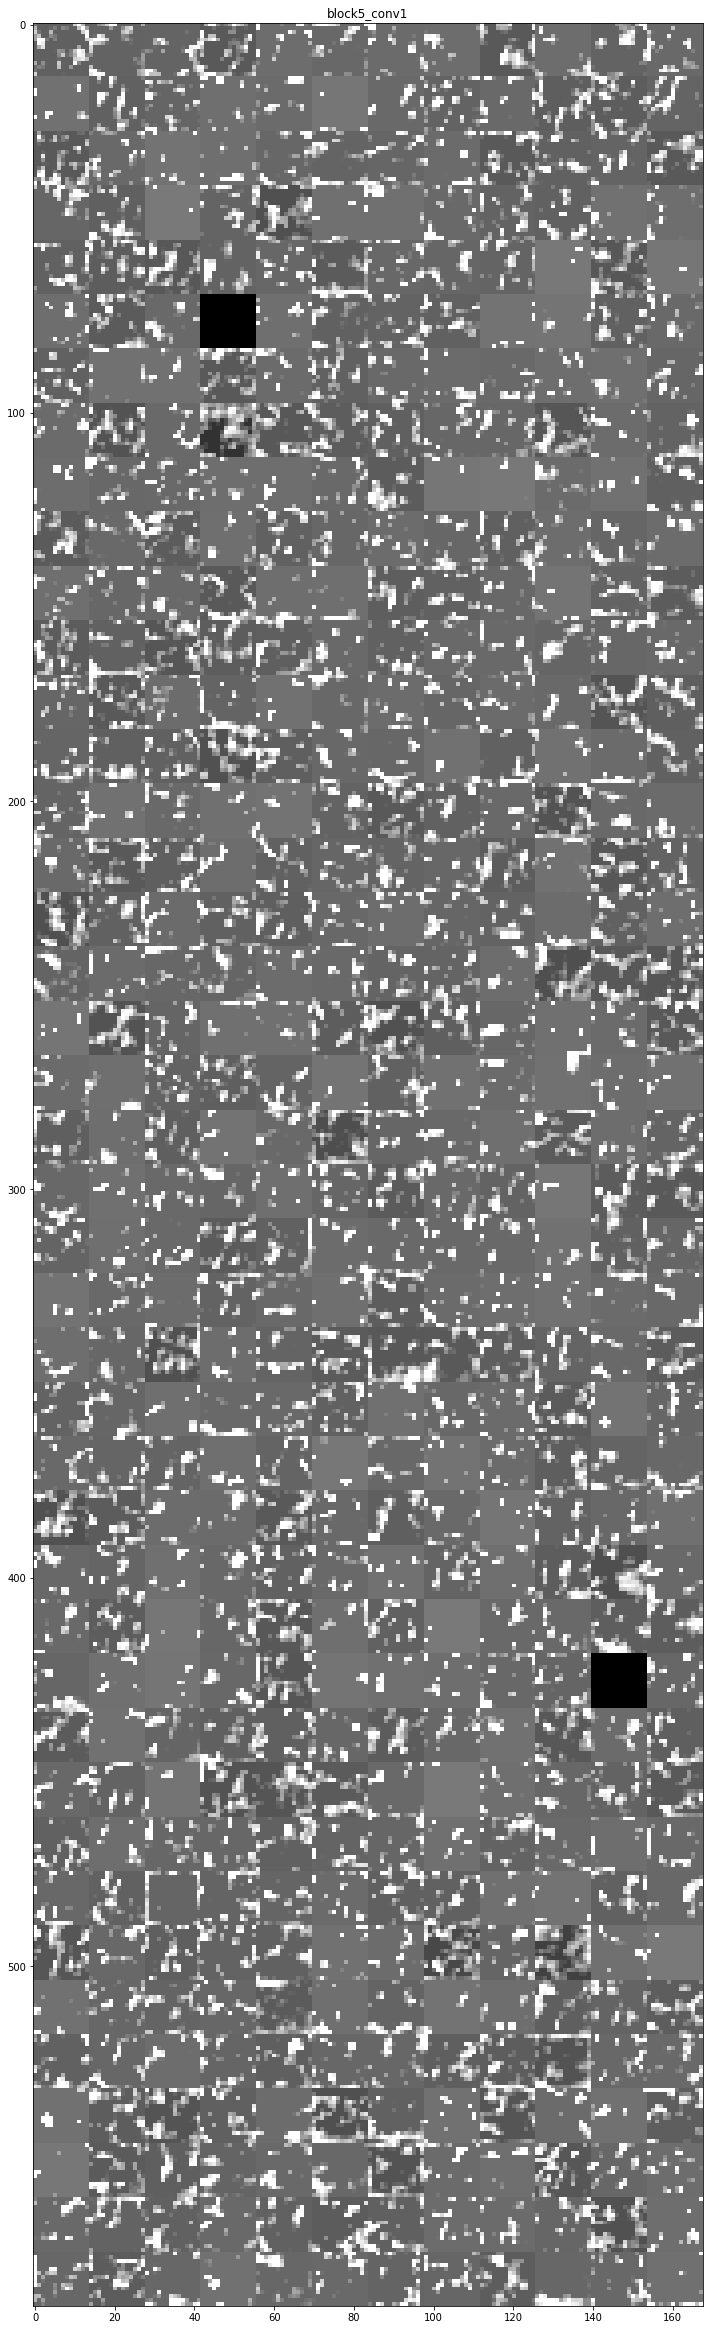

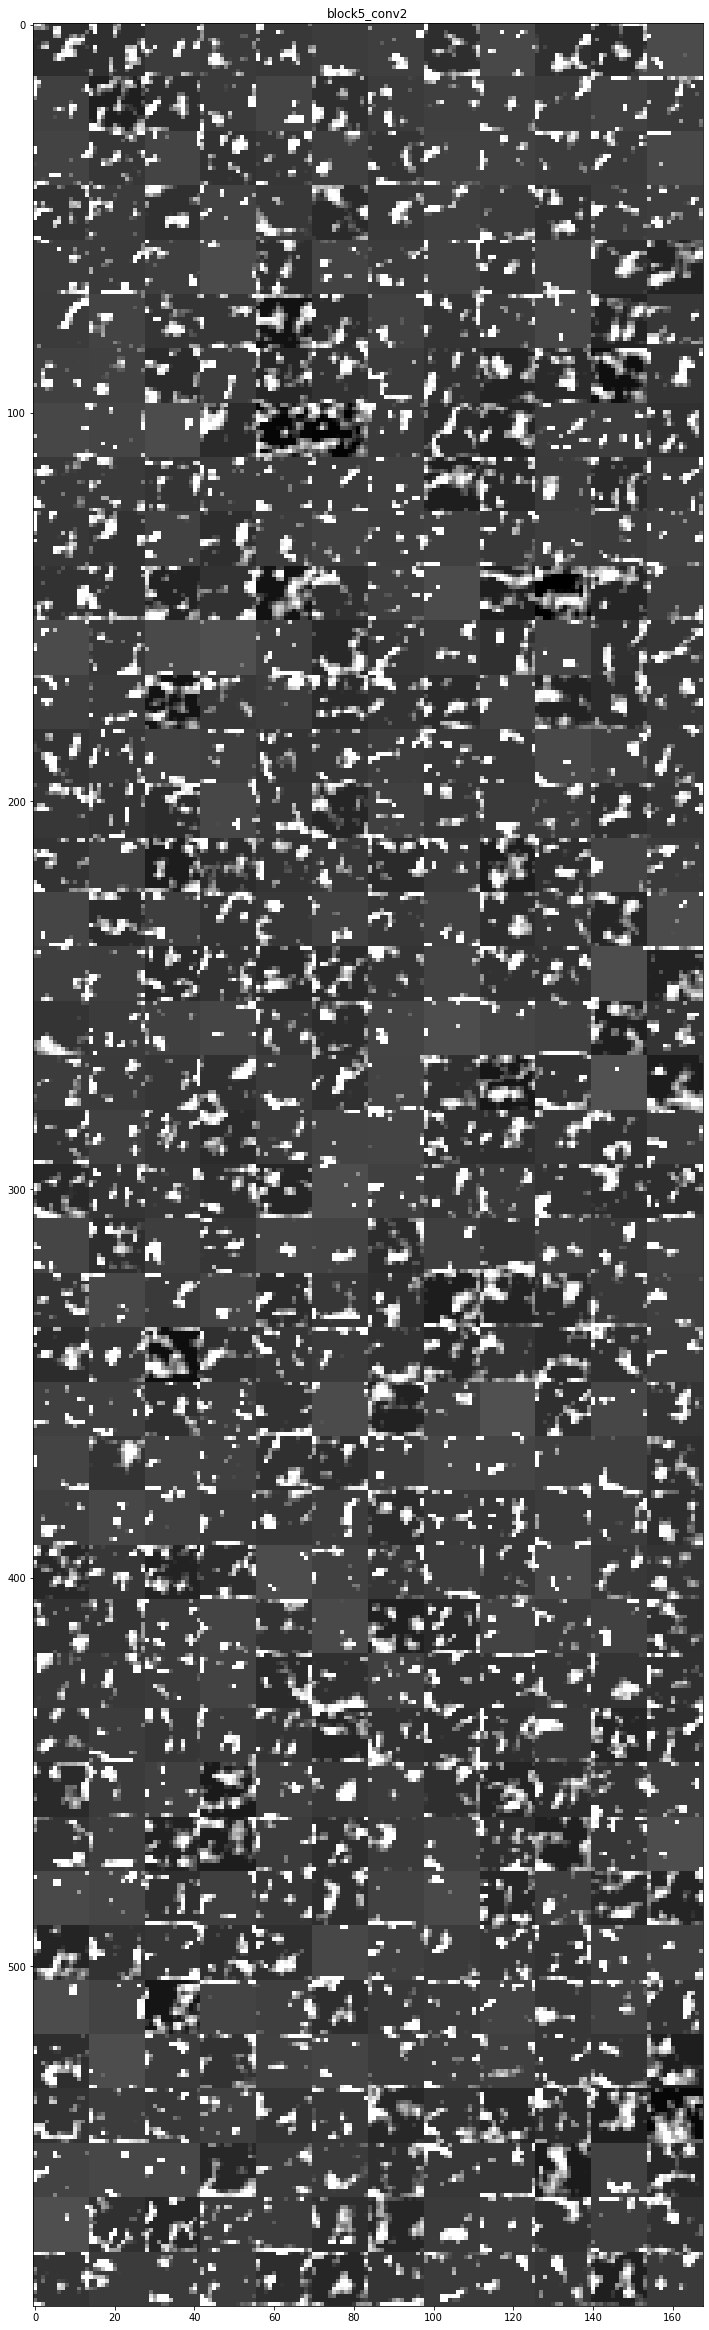

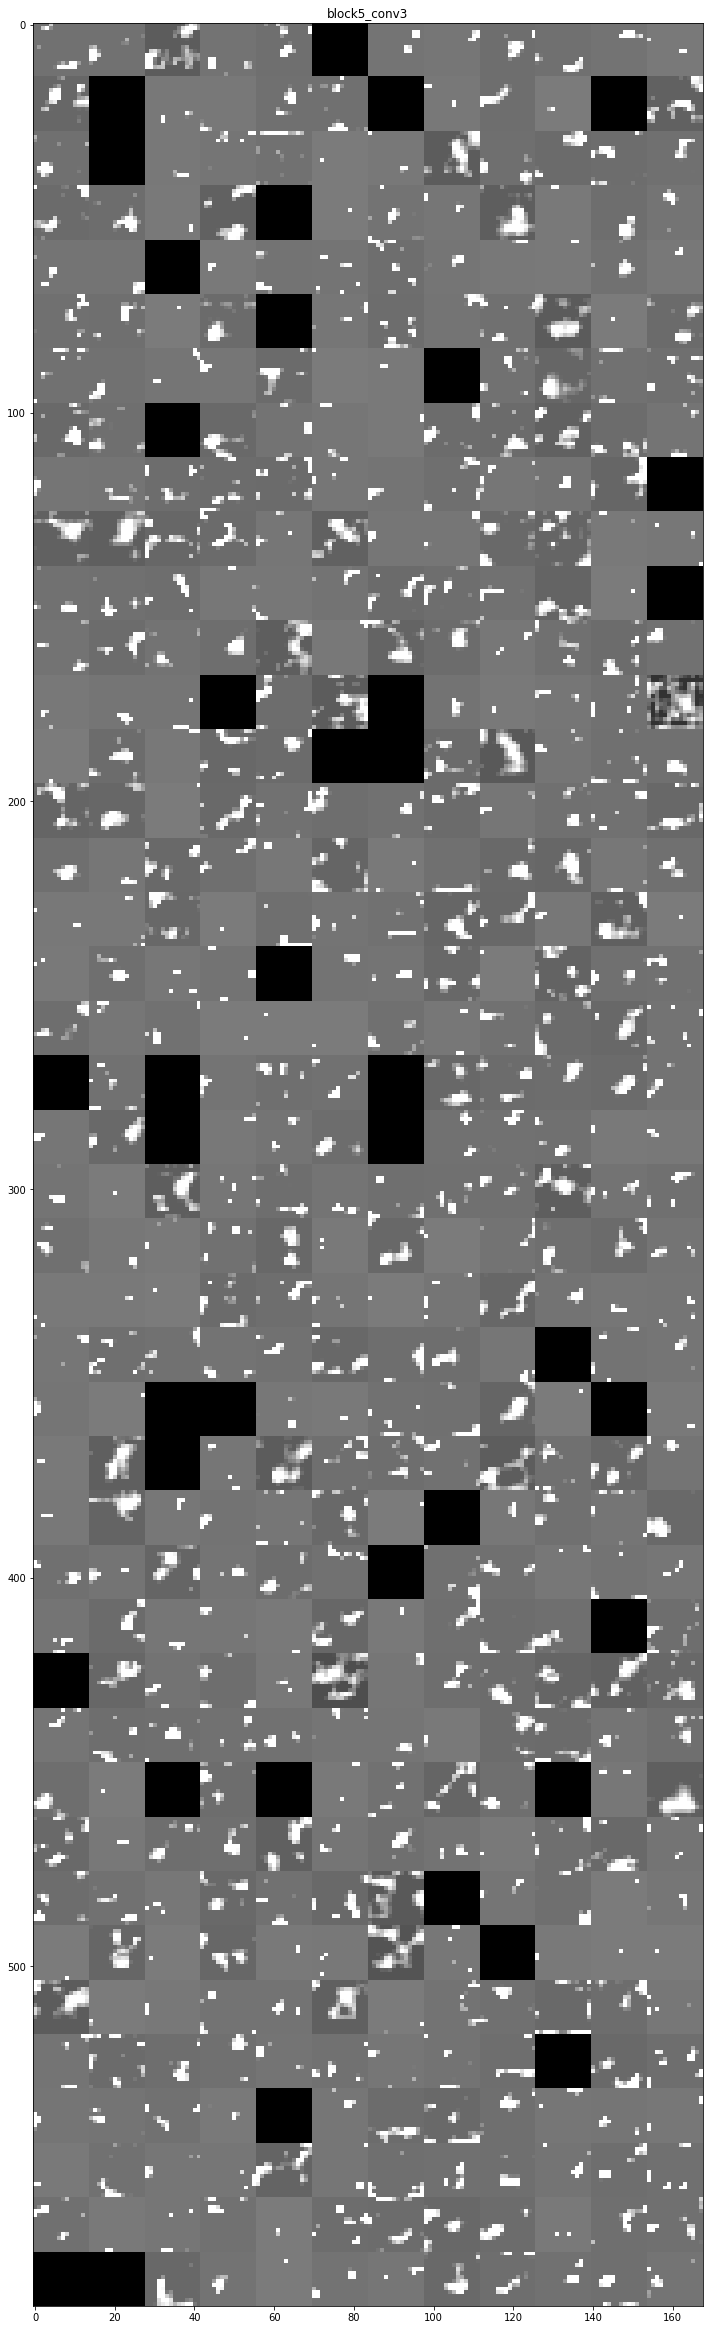

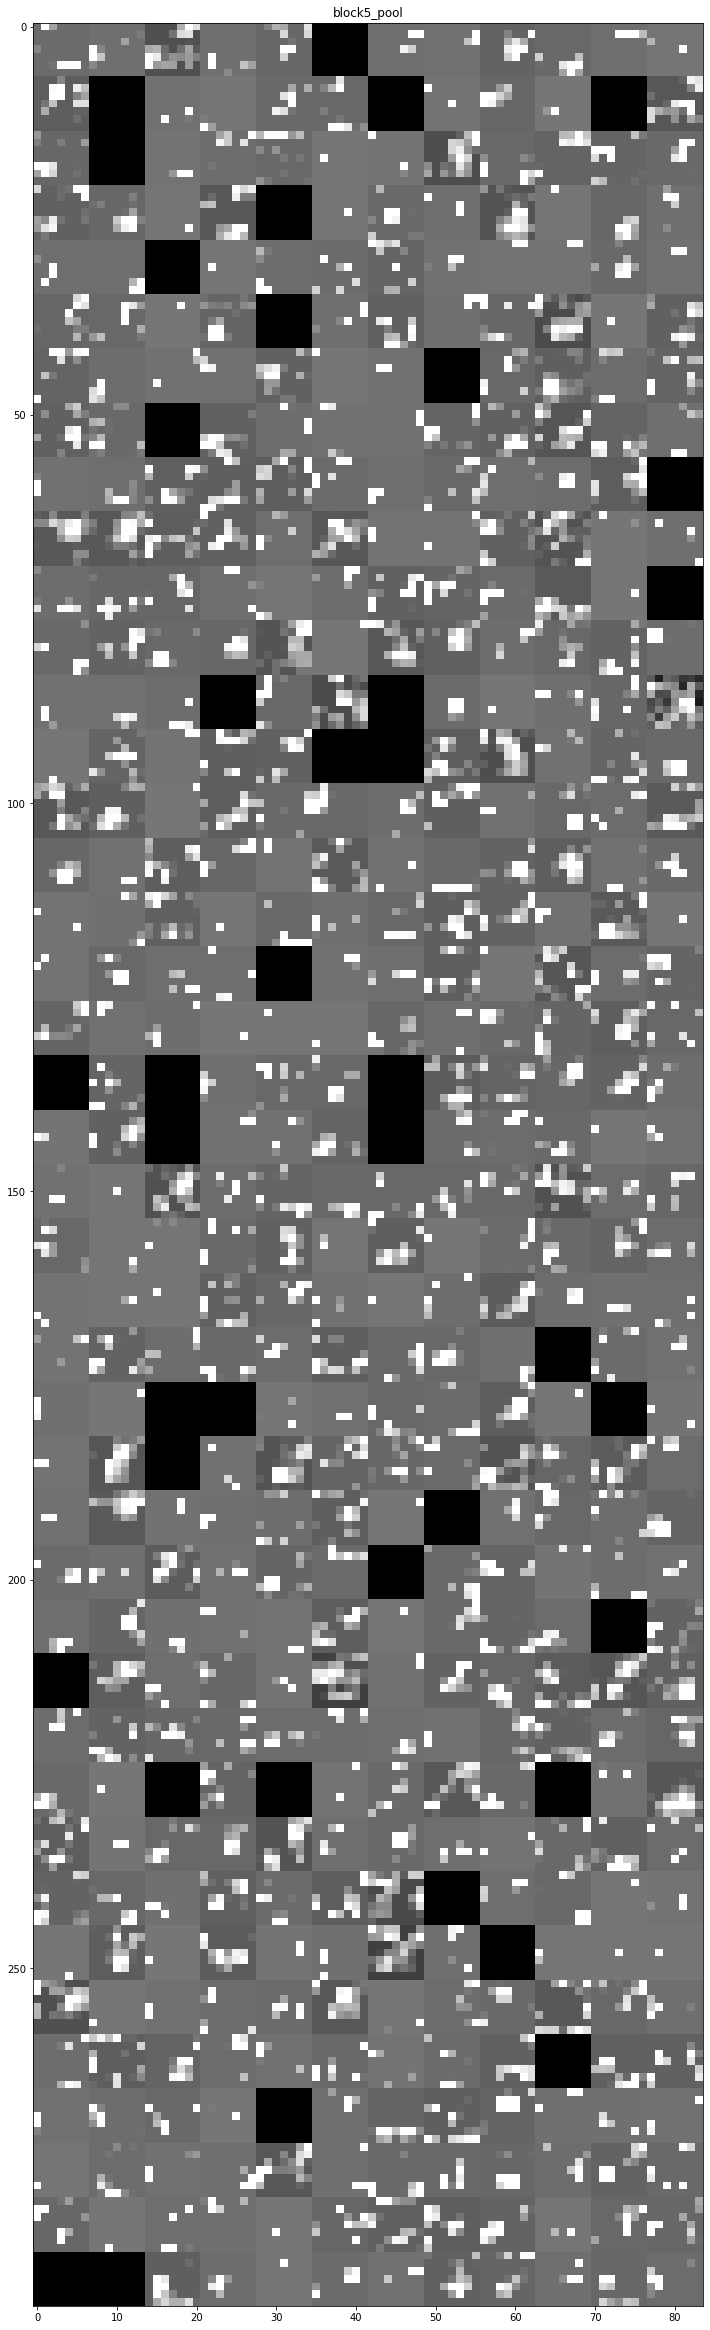

In [ ]:
exp_vgg.print_activations()

## Explainability: Inception v3
 

In [ ]:
exp_vgg = Explainability(image_path, model_inception_path, height, width)

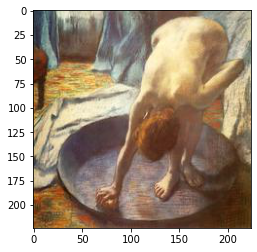

/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset/train/Edgar_Degas/Edgar_Degas_10.jpg


In [ ]:
exp_vgg.print_image()

In [ ]:
exp_vgg.get_activations_maps('inception_v3')

1/1 [==============================] - 2s 2s/step


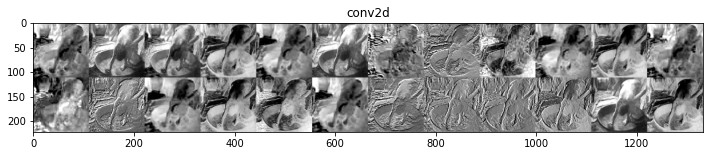

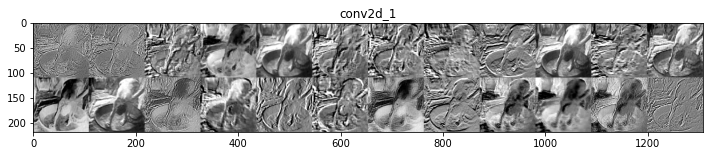

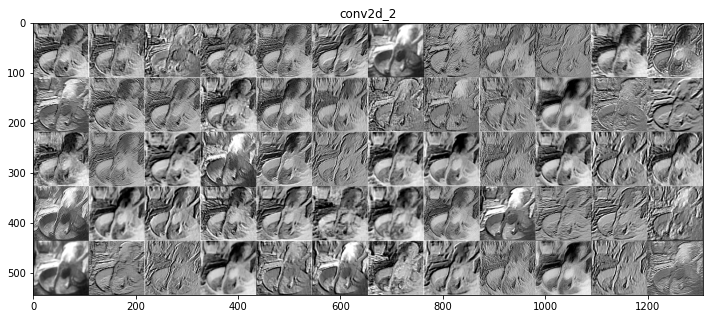

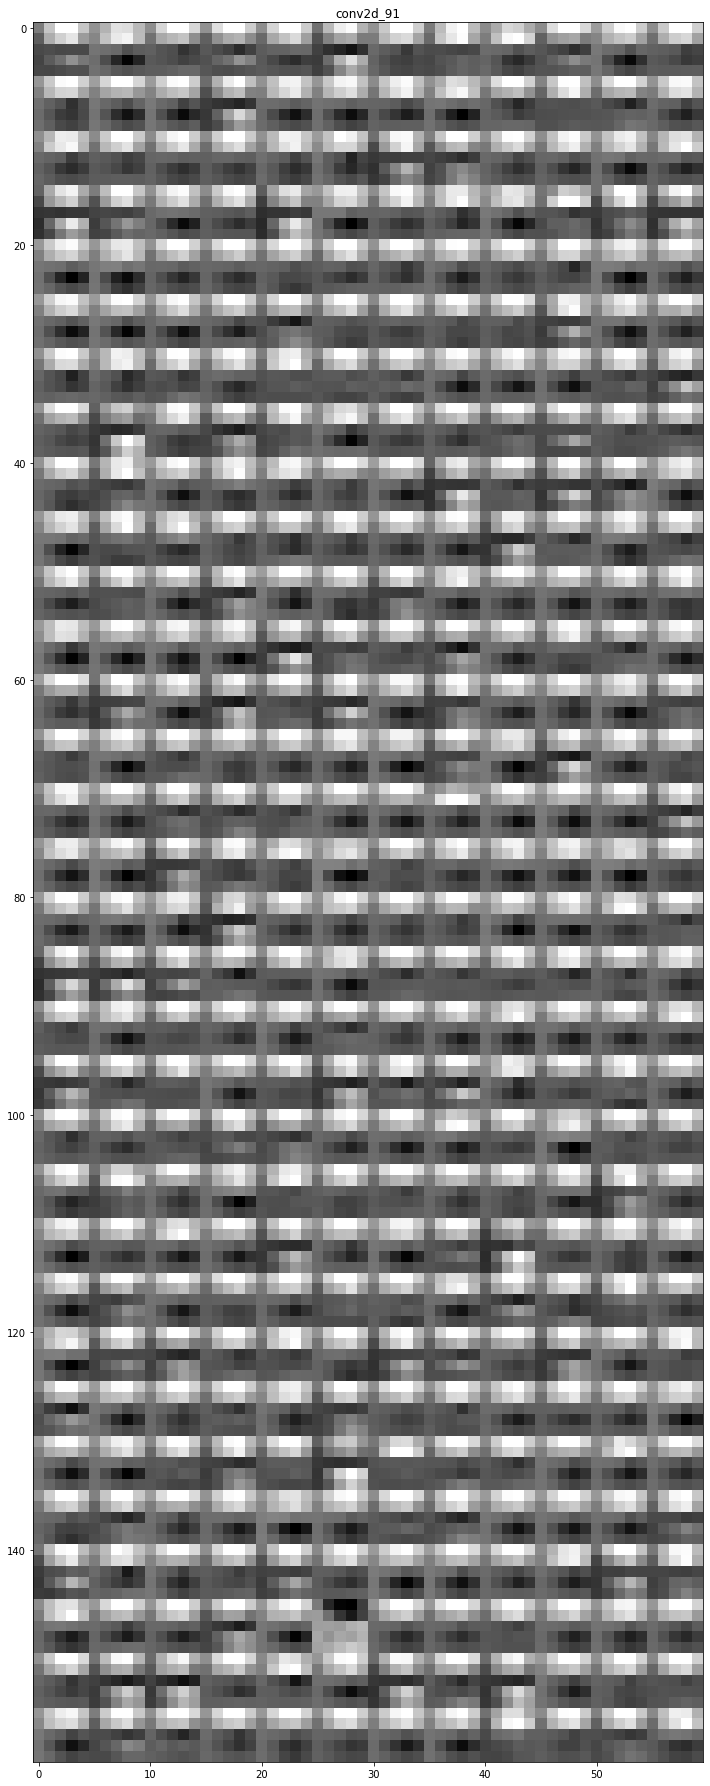

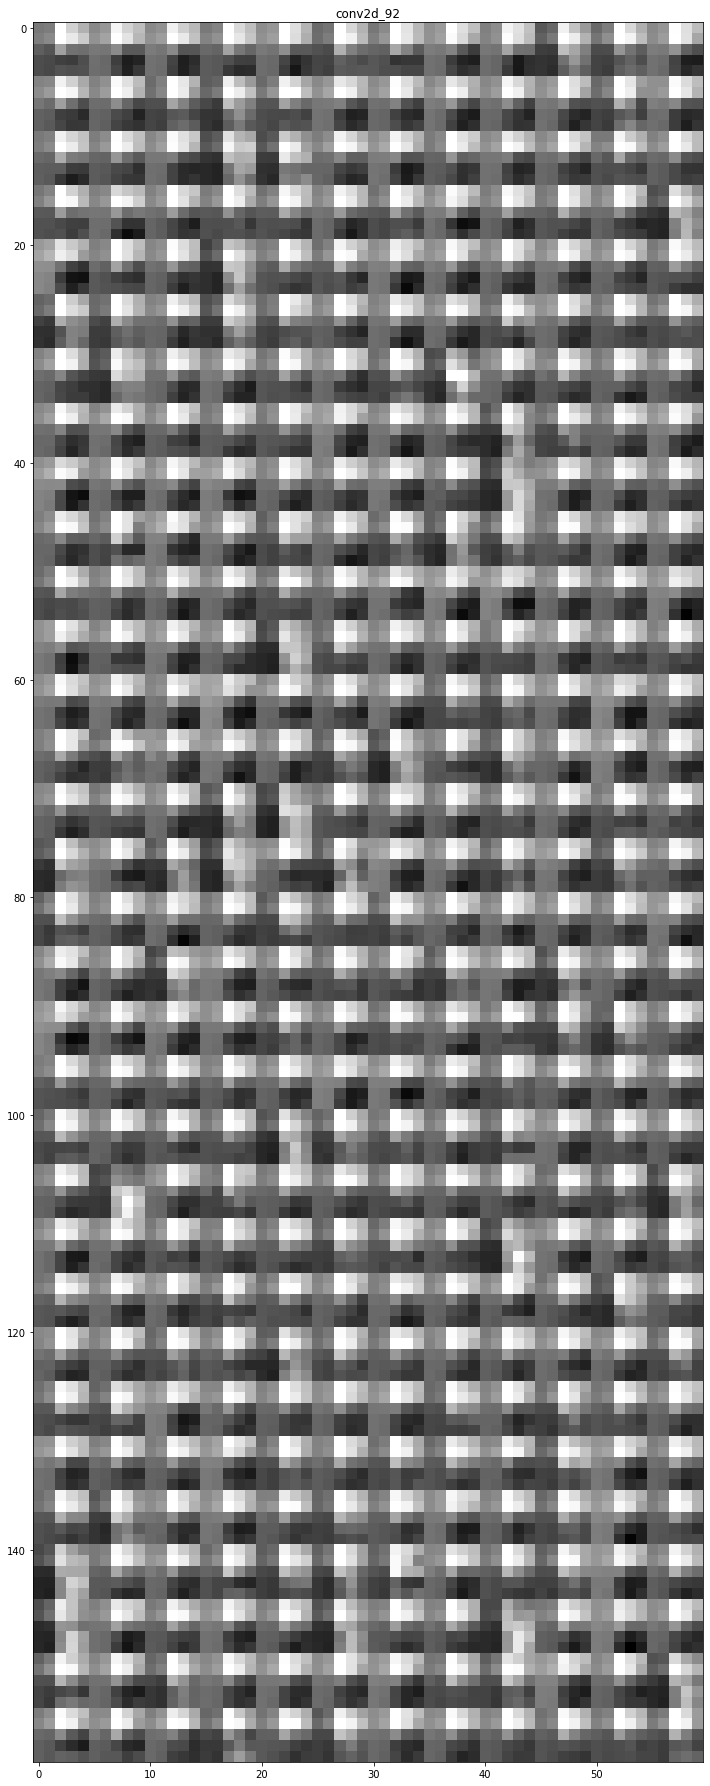

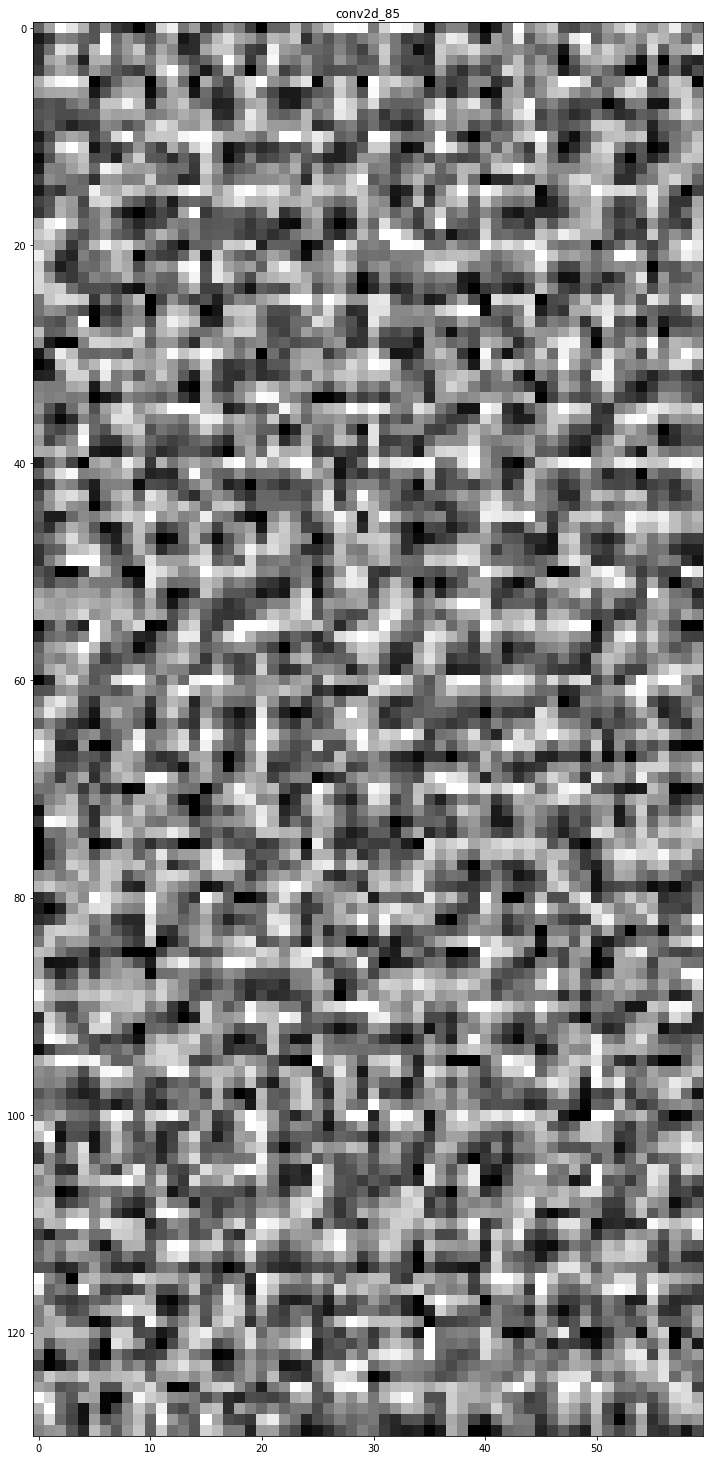

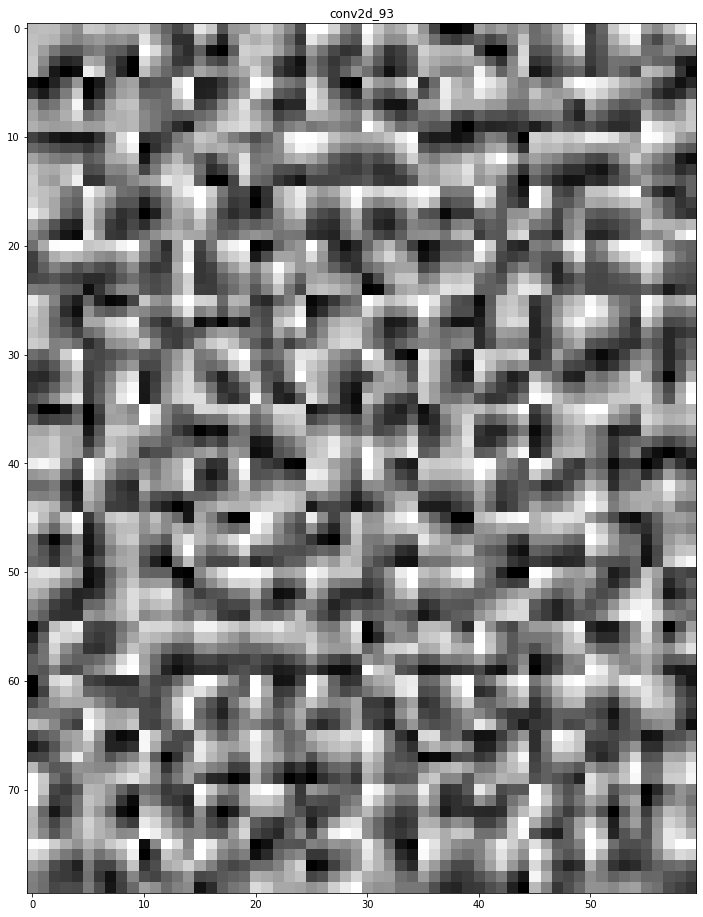

In [ ]:
exp_vgg.print_activations()

## Explainability: From Scratch Network

In [ ]:
exp_resnet = Explainability(image_path, model_from_scratch_path, height, width)

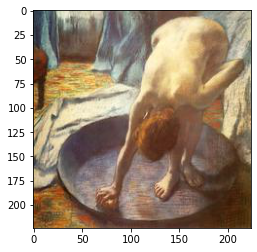

/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset/train/Edgar_Degas/Edgar_Degas_10.jpg


In [ ]:
exp_resnet.print_image()

In [ ]:
exp_resnet.get_activations_maps()

1/1 [==============================] - 0s 17ms/step


<ipython-input-26-6dba704da378>:61: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


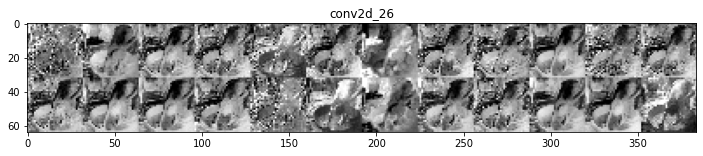

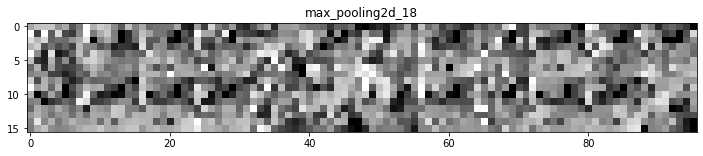

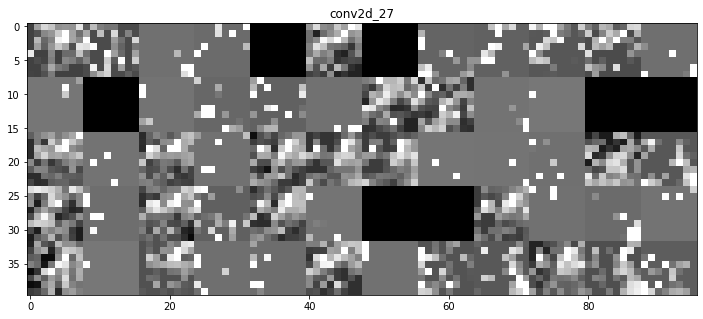

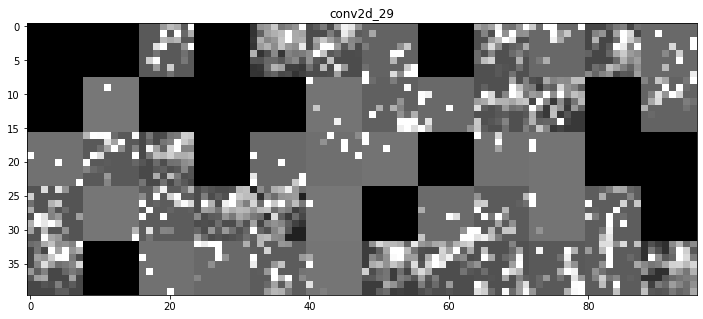

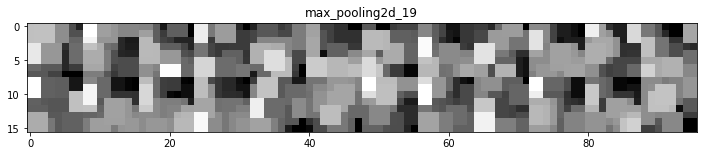

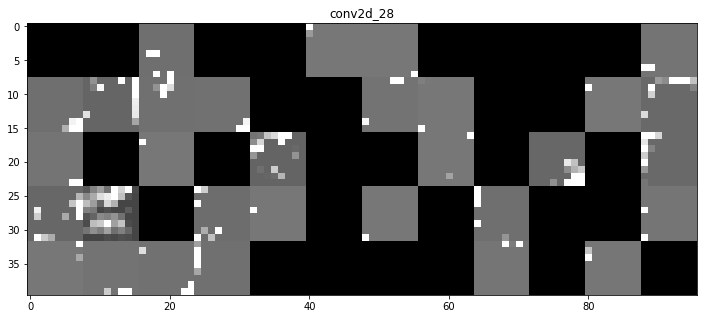

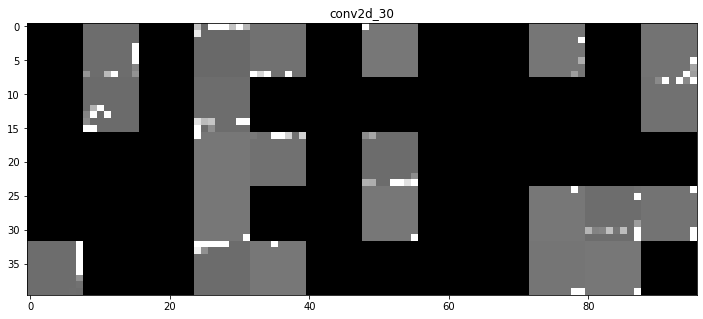

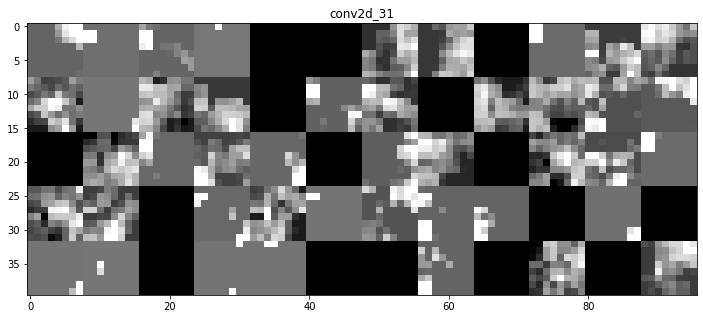

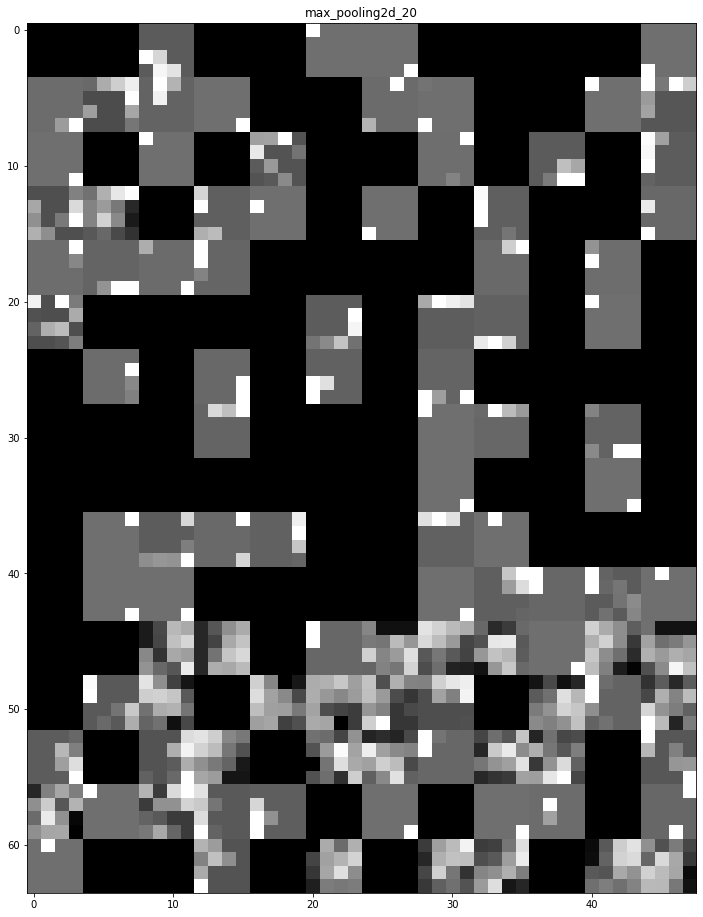

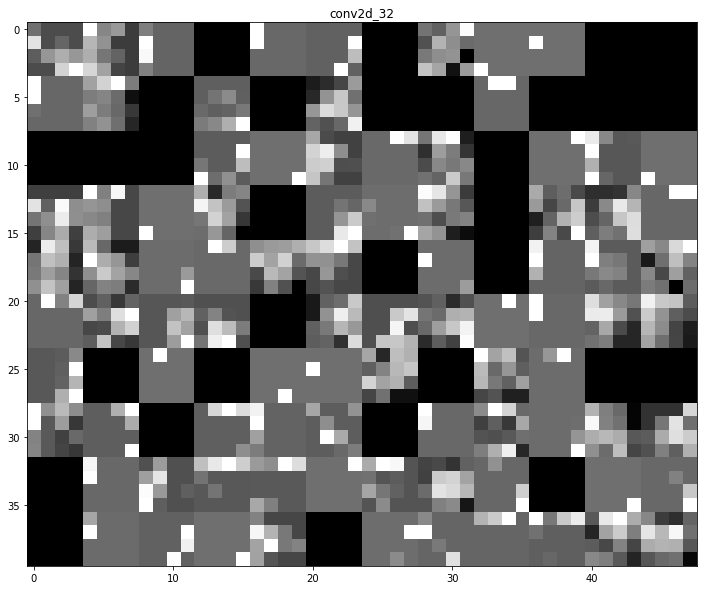

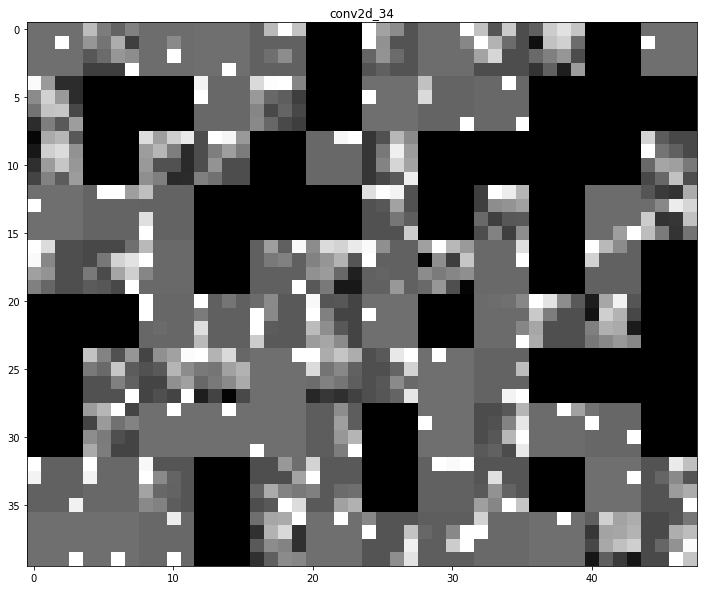

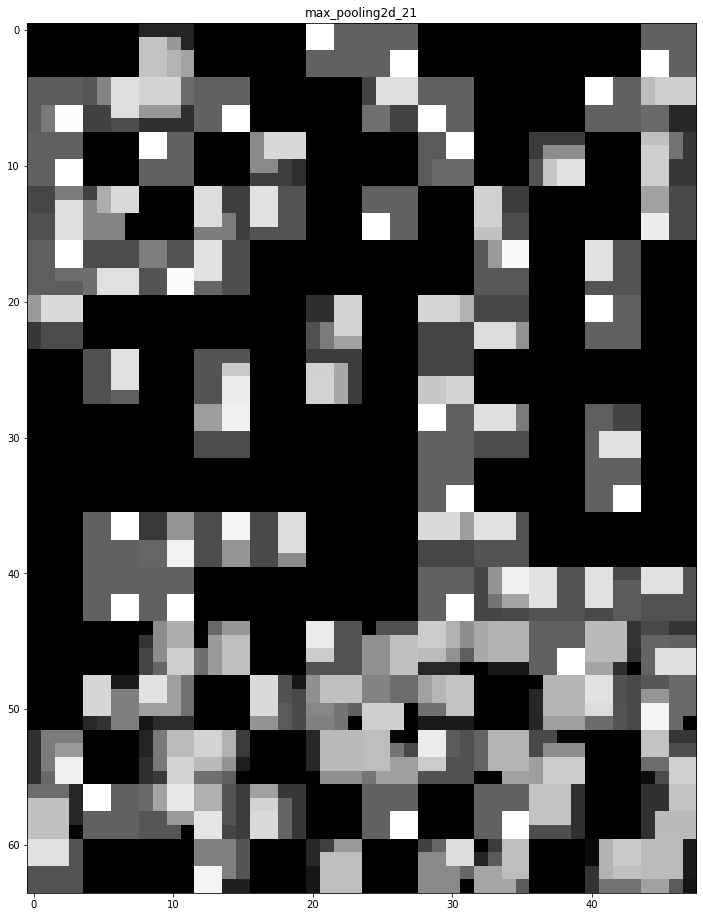

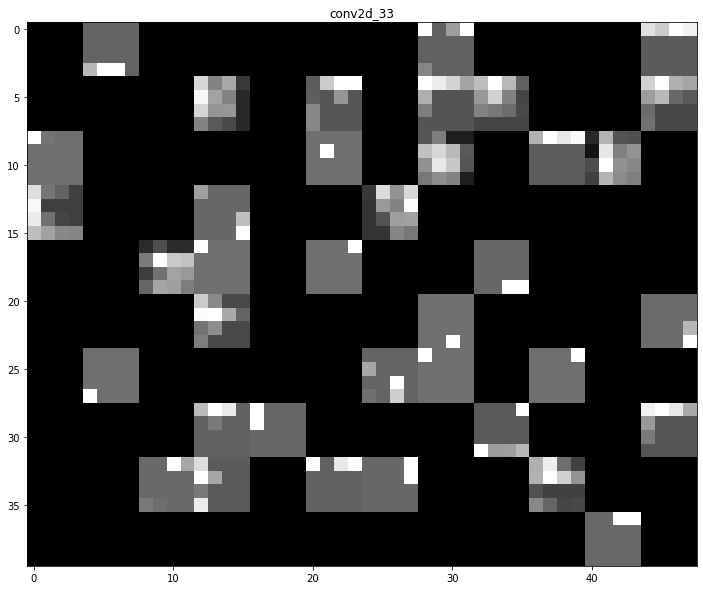

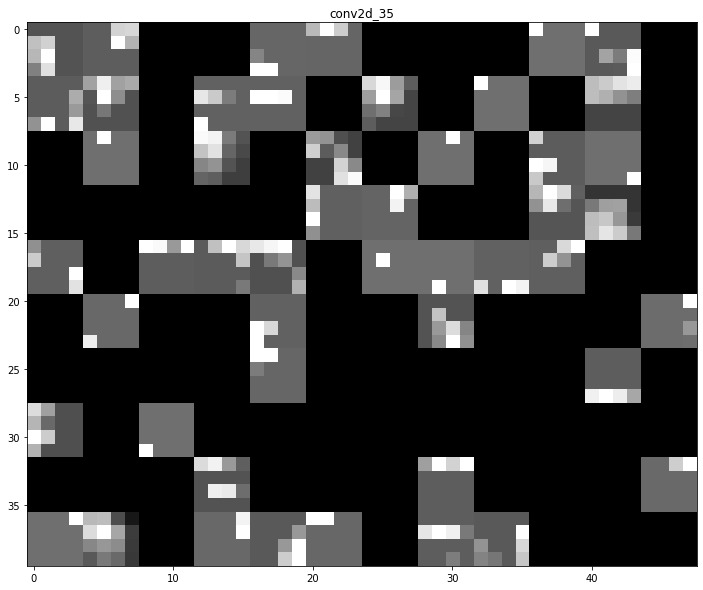

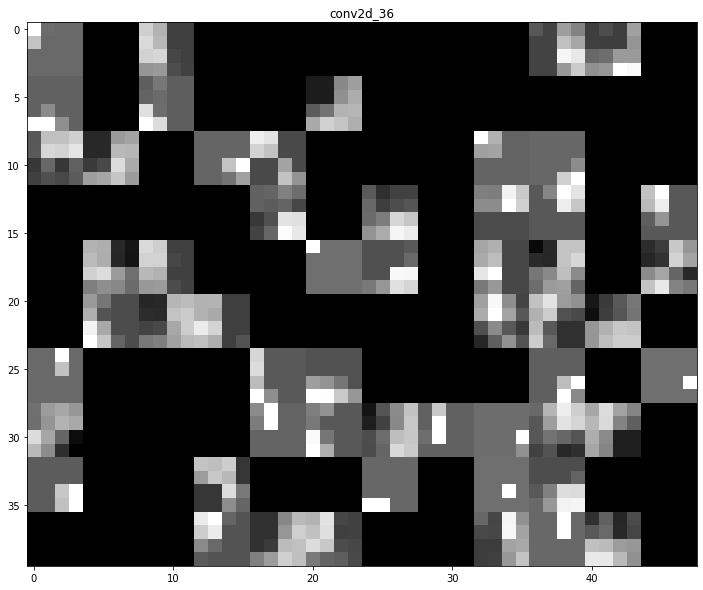

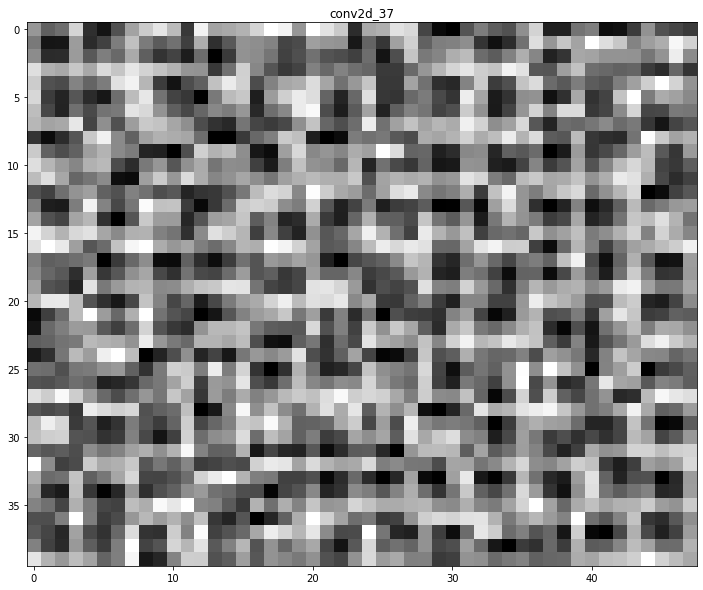

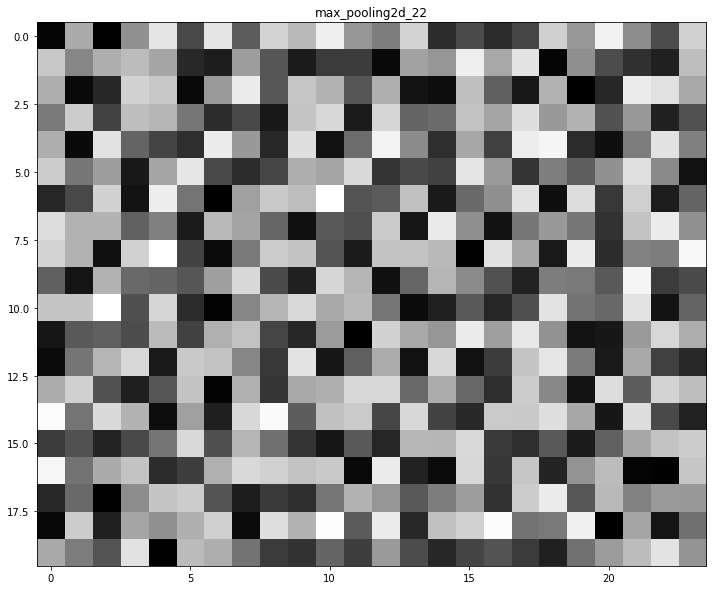

In [ ]:
exp_resnet.print_activations(num_layers_to_show=20)

##Analyze Feature Maps

The idea of visualizing a feature map for a specific input image would be to understand what features of the input are detected or preserved in the feature maps. The expectation would be that the feature maps close to the input detect small or fine-grained detail, whereas feature maps close to the output of the model capture more general features.

In [ ]:
# load a sample image from dataset
img = load_img('/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset/train/Edgar_Degas/Edgar_Degas_10.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)


original_img = mpimg.imread('/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset/train/Edgar_Degas/Edgar_Degas_10.jpg')
plt.imshow(original_img.astype("uint8"))


# load the model
model = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

print("\n Check the input size for conv1:")
# print the size of the filters for conv1
for layer in model.layers:
  # check for convolutional layer
  if 'conv' not in layer.name:
    continue
  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)
print("\n We can see that conv1 uses 64 filters 3×3")

# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 feature maps in an 8x8 squares
square = 8
ix = 1
pyplot.figure(figsize=(50,50))
for _ in range(square):
 for _ in range(square):
  # specify subplot and turn of axis
  ax = pyplot.subplot(square, square, ix)
  ax.set_xticks([])
  ax.set_yticks([])
  # plot filter channel in grayscale
  pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
  ix += 1
# show the figure
pyplot.show()

Output hidden; open in https://colab.research.google.com to view.

# Heatmap of class activation

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import Image, display


In [ ]:
def get_last_conv_layer_index(model):

  index = 0
  i = 0
  for i, layer in enumerate(model.layers):
    if len(layer.output_shape) == 4: # we discriminate conv layer for the 4D dimension
      index = i 
  return index


def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_index, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions

    inputs_intermediate = model.inputs
    outputs_intermediate = model.layers[last_conv_layer_index + 1].input
    inputs_classifier = [model.layers[last_conv_layer_index + 1].input]
    outputs_classifier = model.output

    intermediate_layer_model = keras.Model(inputs=inputs_intermediate, outputs=outputs_intermediate)
    classifier_model = Model(inputs=inputs_classifier, outputs=outputs_classifier)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    # We compute the gradient of the predictions with respect to the activations of the last convolutional layer
    with tf.GradientTape() as tape:
      last_conv_layer_output = intermediate_layer_model(img_array) # output feature maps of the last conv layer.
      tape.watch(last_conv_layer_output)
      preds = classifier_model(last_conv_layer_output)  
      top_pred_index = tf.argmax(preds[0])  # index
      top_class_channel = preds[:, top_pred_index] # prediction value
    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


In [ ]:
def print_heatmap_and_gradcam(model_path, image_path):
  
  img = image.load_img(image_path, target_size=(height, width))
  image_tensor = img_to_array(img)
  image_tensor = np.expand_dims(image_tensor, axis=0)

  model = models.load_model(model_path)


  last_conv_layer_name = get_last_conv_layer_index(model)
  prediction = model.predict(image_tensor)

  # Generate class activation heatmap
  heatmap = make_gradcam_heatmap(image_tensor, model, last_conv_layer_name)

  # Display heatmap
  plt.matshow(heatmap)
  plt.show()

  save_and_display_gradcam(image_path, heatmap)


In [ ]:
height = 224
width = 224

image_path_degas = '/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset/train/Edgar_Degas/Edgar_Degas_10.jpg'
image_path_picasso = '/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset/train/Pablo_Picasso/Pablo_Picasso_112.jpg'
image_path_van_gogh = '/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset/test/Vincent_van_Gogh/Vincent_van_Gogh_573.jpg'

model_vgg_path = '/content/drive/Shareddrives/DeepLearning-ArtClassification/Models/VGG16Weights/NoDropout.h5'
model_inception_path = '/content/drive/Shareddrives/DeepLearning-ArtClassification/Models/InceptionNet/Inception_NoDropout.h5'
model_from_scratch_path = '/content/drive/Shareddrives/DeepLearning-ArtClassification/Models/CNN_from_scratch/9_CNN_Double_inception.h5'
model_resnet_path = '/content/drive/Shareddrives/DeepLearning-ArtClassification/Models/ResNet50Weights/NoDropout.h5'

## Edgar Degas


### Inception

1/1 [==============================] - 2s 2s/step


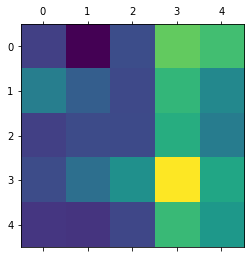

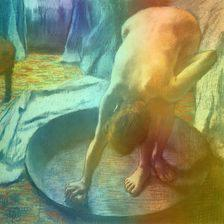

In [ ]:
print_heatmap_and_gradcam(model_inception_path, image_path_degas)

### From scratch 

1/1 [==============================] - 0s 269ms/step


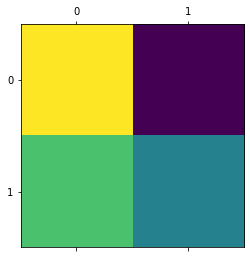

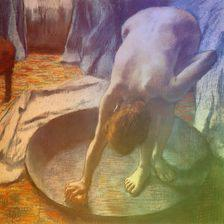

In [ ]:
print_heatmap_and_gradcam(model_from_scratch_path, image_path_degas)

### Vgg16


1/1 [==============================] - 1s 876ms/step


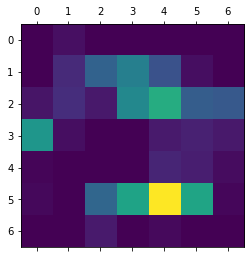

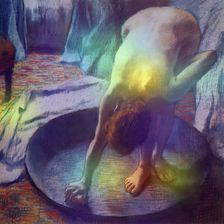

In [ ]:
print_heatmap_and_gradcam(model_vgg_path, image_path_degas)

### Resnet50

1/1 [==============================] - 4s 4s/step


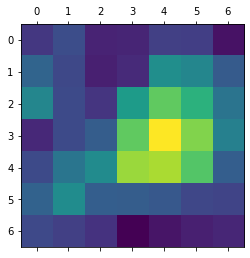

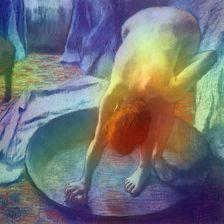

In [ ]:
print_heatmap_and_gradcam(model_resnet_path, image_path_degas)

## Pablo Picasso


### Inception

1/1 [==============================] - 1s 1s/step


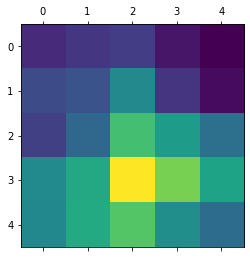

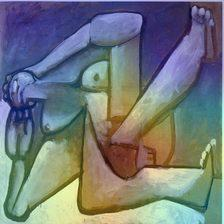

In [ ]:
print_heatmap_and_gradcam(model_inception_path, image_path_picasso)

### From scratch 

1/1 [==============================] - 0s 195ms/step


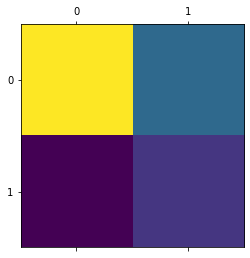

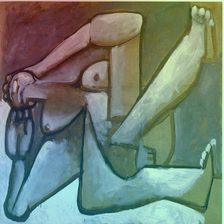

In [ ]:
print_heatmap_and_gradcam(model_from_scratch_path, image_path_picasso)

### Vgg16


1/1 [==============================] - 0s 142ms/step


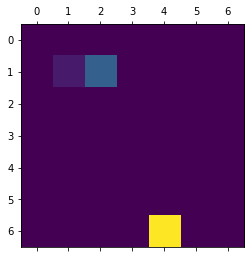

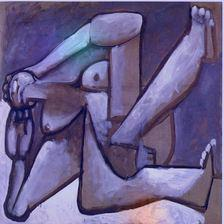

In [ ]:
print_heatmap_and_gradcam(model_vgg_path, image_path_picasso)

### Resnet50

1/1 [==============================] - 2s 2s/step


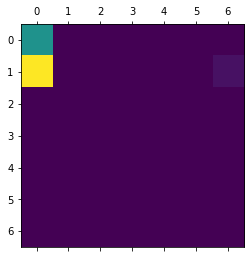

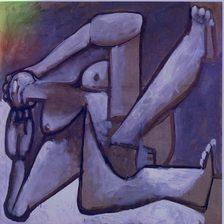

In [ ]:
print_heatmap_and_gradcam(model_resnet_path, image_path_picasso) 

## Vincent Van Gogh


### Inception

1/1 [==============================] - 3s 3s/step


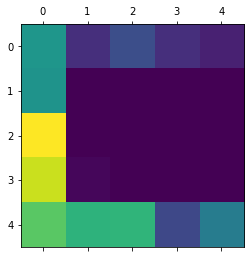

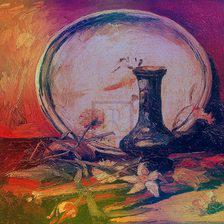

In [ ]:
print_heatmap_and_gradcam(model_inception_path, image_path_van_gogh)

### From scratch 

1/1 [==============================] - 0s 276ms/step


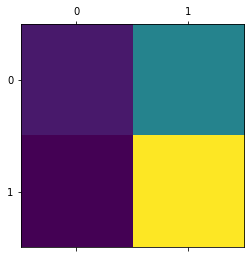

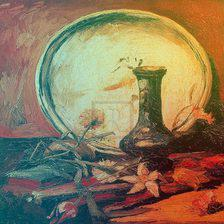

In [ ]:
print_heatmap_and_gradcam(model_from_scratch_path, image_path_van_gogh)

### Vgg16


1/1 [==============================] - 0s 279ms/step


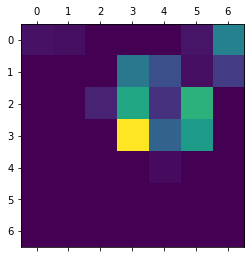

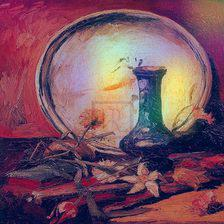

In [ ]:
print_heatmap_and_gradcam(model_vgg_path, image_path_van_gogh)

### Resnet50

1/1 [==============================] - 1s 939ms/step


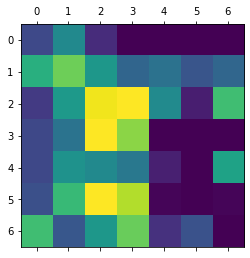

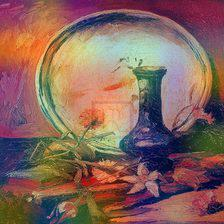

In [ ]:
print_heatmap_and_gradcam(model_resnet_path, image_path_van_gogh)